<a href="https://colab.research.google.com/github/dominiquebuford/CV_project4/blob/dombuford/CV_captioningv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU openimages torch_snippets urllib3
from torch_snippets import *

Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
kaggle.json


In [3]:
!kaggle datasets download -d adityajn105/flickr8k
!unzip flickr8k

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [2]:
import pandas as pd
import numpy as np
!pip install scikit-learn
from sklearn.model_selection import train_test_split

df = pd.read_csv('captions.txt')
paths = df['image'].unique().tolist()
train_paths, val_paths = train_test_split(paths, test_size=0.2, random_state=42)

!mkdir train_images
!mkdir val_images


mkdir: cannot create directory ‘train_images’: File exists
mkdir: cannot create directory ‘val_images’: File exists


In [3]:
import os
import shutil

In [6]:

#move training images to correct folder
destination_folder = 'train_images'
for path in train_paths:
  fullName = os.path.join('Images', path)
  if os.path.exists(fullName):
        # Construct the new path by combining the destination folder with the basename of the file
        # The basename is the name of the file, extracted from the file_path
        new_path = os.path.join(destination_folder, path)

        # Move the file to the new location
        shutil.move(fullName, new_path)




In [7]:
#move validation images to correct folder
destination_folder = 'val_images'
for path in val_paths:
  fullName = os.path.join('Images', path)
  if os.path.exists(fullName):
        # Construct the new path by combining the destination folder with the basename of the file
        # The basename is the name of the file, extracted from the file_path
        new_path = os.path.join(destination_folder, path)

        # Move the file to the new location
        shutil.move(fullName, new_path)

In [8]:
len(os.listdir("train_images"))

6472

In [4]:
df['train'] = df['image'].isin(train_paths)

In [11]:
!pip install torchtext==0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyli

In [5]:
from torchtext.data import Field
from pycocotools.coco import COCO
from collections import defaultdict

captions = Field(sequential=False, init_token = 'startseq', eos_token='')
all_captions = df[df['train']]['caption'].tolist()
all_tokens = [[w.lower() for w in c.split()] for c in all_captions]
all_tokens = [w for sublist in all_tokens for w in sublist]
captions.build_vocab(all_tokens)


In [6]:
class Vocab: pass
vocab = Vocab()
captions.vocab.itos.insert(0, '')
vocab.itos = captions.vocab.itos

vocab.stoi = defaultdict(lambda: captions.vocab.itos.index(''))
vocab.stoi[''] = 0
for s,i in captions.vocab.stoi.items():
    vocab.stoi[s] = i+1

In [10]:
from torchvision import transforms

class CaptioningDataset(Dataset):
  def __init__(self, root, df, vocab):
    self.root = root
    self.df = df.reset_index(drop = True)
    self.vocab = vocab
    self.transform = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                            (0.229, 0.224, 0.225))]
        )
  def __getitem__(self, index):
    row = self.df.iloc[index].squeeze() #turn row into series
    id = row.image
    image_path = f'{self.root}/{id}'
    image = Image.open(os.path.join(image_path)).convert('RGB')
    caption = row.caption
    tokens = str(caption).split()
    target = []
    target.append(vocab.stoi['startseq'])
    target.extend([vocab.stoi[token.lower()] for token in tokens])
    target.append(vocab.stoi[''])
    target = torch.Tensor(target).long()
    return image, target, caption
  def choose(self):
    return self[np.random.randint(len(self))]
  def __len__(self):
    return len(self.df)
  def collate_fn(self, data):
    """
    determine how the batches of data are combined in the dataloader-- pad the captions to be length of longest caption
    """
    data.sort(key=lambda x: len(x[1]), reverse=True)
    images, targets, captions = zip(*data)
    images = torch.stack([self.transform(image) for image in images], 0)
    lengths = [len(tar) for tar in targets]
    _targets = torch.zeros(len(captions), max(lengths)).long()
    for i, tar in enumerate(targets):
      end = lengths[i]
      _targets[i, :end] = tar[:end]
    return images.to(device), _targets.to(device), torch.tensor(lengths).long().to(device)



Index 1713: 'parasailing'
['Lots', 'of', 'people', 'gathering', 'in', 'a', 'line', '.']

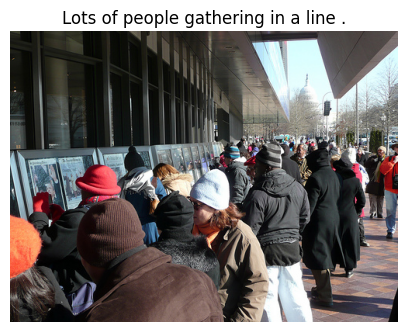

tensor([   2, 1238,   14,   26, 1334,    6,    4,  292,    5,    3])

In [11]:
trn_ds = CaptioningDataset('train_images', df[df['train']], vocab)
val_ds = CaptioningDataset('val_images', df[~df['train']], vocab)

image, target, caption = trn_ds.choose()
tokens = str(caption).split()
print(tokens)
show(image, title=caption, sz=5); print(target)

In [ ]:
for index, string in enumerate(vocab.itos):
    print(f"Index {index}: '{string}'")

In [25]:
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import models
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)
        modules = list(resnet.children())[:-1] # delete the last fc layer.
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))
        return features

In [31]:


class Attention(nn.Module):
    def __init__(self, encoder_dim, decoder_dim, attention_dim):
        """Set the hyper-parameters and build the attention layer."""
        super(Attention, self).__init__()
        self.attention_dim = attention_dim
        self.W = nn.Linear(decoder_dim, attention_dim)
        self.U = nn.Linear(encoder_dim, attention_dim)
        self.A = nn.Linear(attention_dim, 1)

    def forward(self, features, hidden_state):
        """
        features: output features from the encoder (batch_size, num_pixels, encoder_dim)
        hidden_state: previous hidden state of the decoder (batch_size, decoder_dim)
        """
        if hidden_state is None:
          # Assuming features is not empty and has shape (batch_size, num_pixels, encoder_dim)
          batch_size = features.size(0)
          hidden_state = torch.zeros(batch_size, self.W.in_features, device=features.device)
        u_hs = self.U(features)  # (batch_size, num_pixels, attention_dim)
        w_ah = self.W(hidden_state)  # (batch_size, attention_dim)
        combined_states = torch.tanh(u_hs + w_ah.unsqueeze(1))  # (batch_size, num_pixels, attention_dim)
        attention_scores = self.A(combined_states)  # (batch_size, num_pixels, 1)
        attention_scores = attention_scores.squeeze(2)  # (batch_size, num_pixels)
        alpha = F.softmax(attention_scores, dim=1)  # (batch_size, num_pixels)
        context_vector = (features * alpha.unsqueeze(2)).sum(dim=1)  # (batch_size, encoder_dim)

        return context_vector, alpha


In [119]:
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, attention_dim, encoder_dim, hidden_size, vocab_size, num_layers, max_seq_length=80):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.attention = Attention(encoder_dim, hidden_size, attention_dim)
        self.lstm = nn.LSTM(embed_size + encoder_dim, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        self.drop = nn.Dropout(0.2)

    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        hiddens, states = None, None
        max_length = max(lengths)
        batch_size = captions.size(0)
        vocab_size = self.linear.out_features  # Assuming your linear layer maps to the vocab size

        # Preallocate output tensor
        outputs = torch.zeros(batch_size, max_length, vocab_size, device=embeddings.device)
        #for s in range(max_length):
            #context, _ = self.attention(features, hiddens)
           # lstm_input = torch.cat((embeddings[:, s], context), dim=1).unsqueeze(1)
            #hiddens, states = self.lstm(lstm_input, states)
            #output = self.linear(self.drop(hiddens))
           # print('output shape', output.shape)

            #outputs[:,s, :] = output

        for t in range(max_length):
            batch_size_t = sum([l > t for l in lengths])
            if states is not None:
                # Resize states to match the current active sequences
                states = (states[0][:, :batch_size_t, :], states[1][:, :batch_size_t, :])

            if states is None:
                context_vector, _ = self.attention(features[:batch_size_t], None)
            else:
                context_vector, _ = self.attention(features[:batch_size_t], states[0][0][:batch_size_t])

            lstm_input = torch.cat([embeddings[:batch_size_t, t, :], context_vector], dim=1).unsqueeze(1)

            hiddens, states = self.lstm(lstm_input, states)
            output = self.linear(hiddens.squeeze(1))

            # Store outputs in preallocated tensor
            outputs[:batch_size_t, t, :] = output


        # Now you should reshape outputs before packing it
        return outputs
    def predict(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []
        word = torch.tensor(vocab.stoi['startseq']).view(1,-1).to(device)
        inputs = self.embed(word)

        for i in range(self.max_seq_length):
          if states is None:
            # Initially, there is no previous state, the attention mechanism needs handling for this case.
            context_vector, _ = self.attention(features, None)
          else:
            # Compute context vector using the previous hidden state.
            context_vector, _ = self.attention(features, states[0][0])
          context_vector = context_vector.unsqueeze(1)
          lstm_input = torch.cat([inputs, context_vector], dim=2)
          hiddens, states = self.lstm(lstm_input, states) # hiddens: (batch_size, 1, hidden_size)
          outputs = self.linear(hiddens.squeeze(1)) # outputs: (batch_size, vocab_size)
          _, predicted = outputs.max(1) # predicted: (batch_size)
          sampled_ids.append(predicted)
          inputs = self.embed(predicted) # inputs: (batch_size, embed_size)
          inputs = inputs.unsqueeze(1) # inputs: (batch_size, 1, embed_size)

        sampled_ids = torch.stack(sampled_ids, 1) # sampled_ids: (batch_size, max_seq_length)
        # convert predicted tokens to strings
        sentences = []
        for sampled_id in sampled_ids:
            sampled_id = sampled_id.cpu().numpy()
            sampled_caption = []
            for word_id in sampled_id:
                word = vocab.itos[word_id]
                sampled_caption.append(word)
                if word == '':
                    break
            sentence = ' '.join(sampled_caption)
            sentences.append(sentence)
        return sentences

In [100]:
def train_batch(data, encoder, decoder, optimizer, criterion, vocab_size):
    encoder.train()
    decoder.train()
    images, captions, lengths = data
    images = images.to(device)
    captions = captions.to(device)
    features = encoder(images)
    outputs = decoder(features, captions, lengths)
    outputs = pack_padded_sequence(outputs, lengths.cpu(), batch_first=True).data
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True).data

    # Calculate loss
    loss = criterion(outputs, targets)
    decoder.zero_grad()
    encoder.zero_grad()
    loss.backward()
    optimizer.step()
    return loss

In [84]:
@torch.no_grad()
def validate_batch(data, encoder, decoder, criterion):
    encoder.eval()
    decoder.eval()
    images, captions, lengths = data
    images = images.to(device)
    captions = captions.to(device)
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]
    features = encoder(images)
    outputs = decoder(features, captions, lengths)
    outputs = pack_padded_sequence(outputs, lengths.cpu(), batch_first=True, enforce_sorted=False).data
    loss = criterion(outputs, targets)
    return loss

In [120]:
encoder = EncoderCNN(256).to(device)
decoder = DecoderRNN(256, 256, 256, 512, len(vocab.itos), 1).to(device)
criterion = nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters())
optimizer = torch.optim.AdamW(params, lr=1e-3)
n_epochs = 10
log = Report(n_epochs)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [29]:
trn_dl = DataLoader(trn_ds, 32, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, collate_fn=val_ds.collate_fn)

In [ ]:

for epoch in range(n_epochs):
    if epoch == 5: optimizer = torch.optim.AdamW(params, lr=1e-4)
    N = len(trn_dl)
    for i, data in enumerate(trn_dl):
        trn_loss = train_batch(data, encoder, decoder, optimizer, criterion, len(vocab.itos))
        pos = epoch + (1+i)/N
        log.record(pos=pos, trn_loss=trn_loss, end='\r')

    N = len(val_dl)
    for i, data in enumerate(val_dl):
        val_loss = validate_batch(data, encoder, decoder, criterion)
        pos = epoch + (1+i)/N
        log.record(pos=pos, val_loss=val_loss, end='\r')

    log.report_avgs(epoch+1)

log.plot_epochs(log=True)


EPOCH: 0.440  trn_loss: 0.697  (357.20s - 7766.09s remaining)

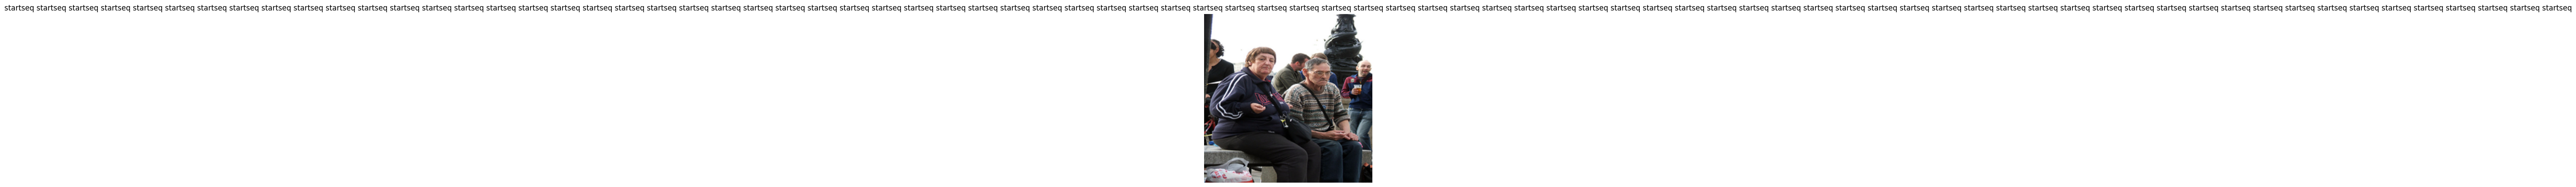

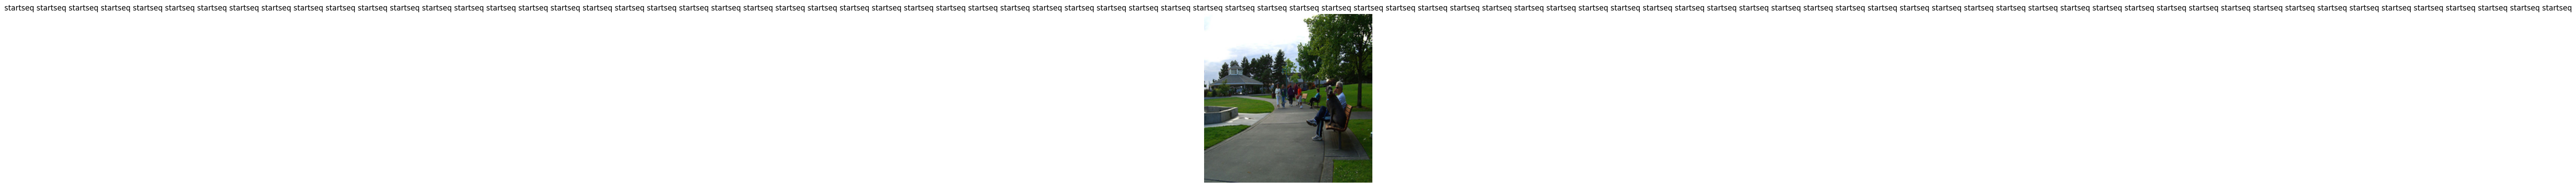

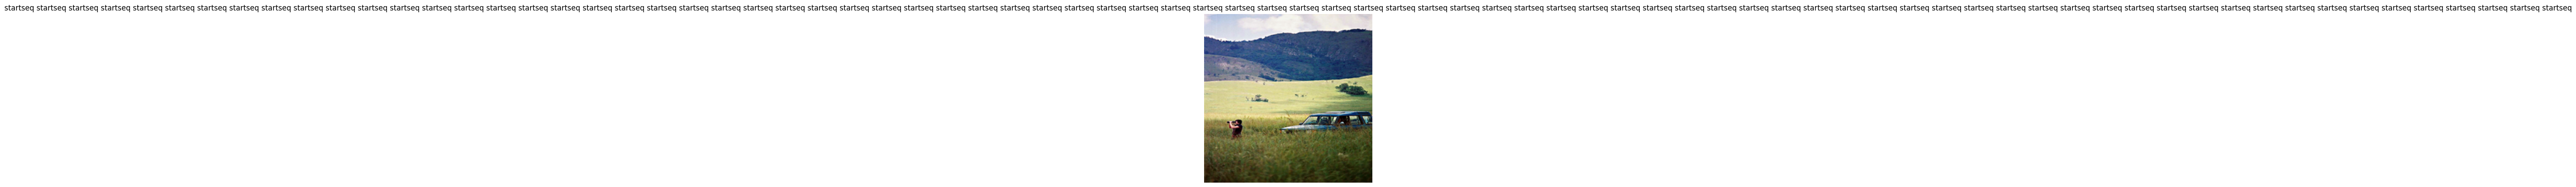

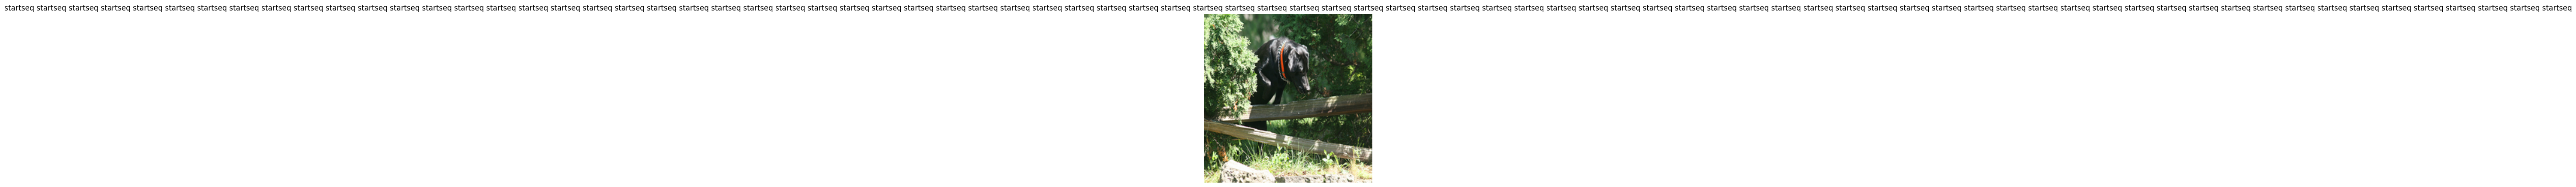

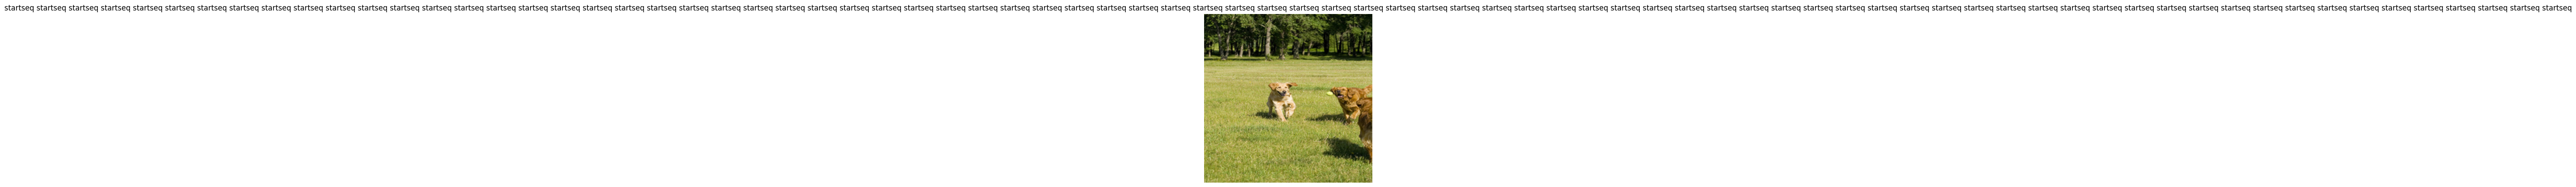

In [123]:
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)
    if transform is not None:
        tfm_image = transform(image)[None]
    return image, tfm_image

@torch.no_grad()
def load_image_and_predict(image_path):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                             (0.229, 0.224, 0.225))
    ])

    org_image, tfm_image = load_image(image_path, transform)
    image_tensor = tfm_image.to(device)
    encoder.eval()
    decoder.eval()
    feature = encoder(image_tensor)
    sentence = decoder.predict(feature)[0]
    show(org_image, title=sentence)
    return sentence

files = Glob('train_images')
for _ in range(5):
    load_image_and_predict(choose(files))


In [109]:
vocab.itos[5]

'in'

In [95]:
sampled_id = [ 2,  0,  9,  5,  3, 28, 23, 10, 26,  7,  3, 92,  4,  2,  0,  9,  5,  3,
         28, 23,  8,  3, 30, 23, 10, 26,  7,  3, 92,  4,  2,  0,  9,  5,  3, 28,
         23,  8,  3, 30, 23, 10, 26,  7,  3, 92,  4,  2,  0,  9,  5,  3, 28, 23,
          8,  3, 30, 23, 10, 26,  7,  3, 92,  4,  2,  0,  9,  5,  3, 28, 23,  8,
          3, 30, 23, 10, 26,  7,  3, 92]
for word_id in sampled_id:
    print(vocab.itos[word_id])

man

in

a

blue

shirt

is

sitting

on

a

bench

.

man

in

a

blue

shirt

and

a

black

shirt

is

sitting

on

a

bench

.

man

in

a

blue

shirt

and

a

black

shirt

is

sitting

on

a

bench

.

man

in

a

blue

shirt

and

a

black

shirt

is

sitting

on

a

bench

.

man

in

a

blue

shirt

and

a

black

shirt

is

sitting

on

a

bench

In [88]:

def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)
    if transform is not None:
        tfm_image = transform(image)[None]
    return image, tfm_image

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                             (0.229, 0.224, 0.225))
    ])
orig, transform_image = load_image("/content/train_images/1000092795.jpg", transform)
image_tensor = transform_image.to(device)
feature = encoder(image_tensor)
print(decoder.predict(feature))


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 256])